### Question 1.

* You collected data about coral cover (number of coral heads from a species X) in 100 quadrats in 2018 in region Y.
 * Quadrat size in not relevant or important
* You hypothesize that the environmental stressor that occurred earlier caused a deciline in species X's coverage in the region Y
* You re-assessed the coral coverage in 25 of the quadrats you initially sampled in 2018 

* Use sampling to conclude whether the average coverage has decrease between 2018 and after the stressor event.
  * Plot your result and compute the p-value of the event.
  * i.e., what does the null distrubution for averages look like and where does your actual observer value occur

* Use the data is below. 


In [73]:
setwd('/Users/SophiaRahnke/Desktop')
library(tidyverse)
data = read_csv("survey_2018.csv")

head(data)

#is there a difference in means between the old values and new values 

Parsed with column specification:
cols(
  transect_id = col_double(),
  coverage = col_double()
)


transect_id,coverage
1,26
2,32
3,21
4,21
5,26
6,23


In [74]:
set.seed(42)

n = 10000

coverage_means <- n %>%
  replicate(sample(data$coverage, 50)) %>%
  t() %>%
  apply(  1, mean)


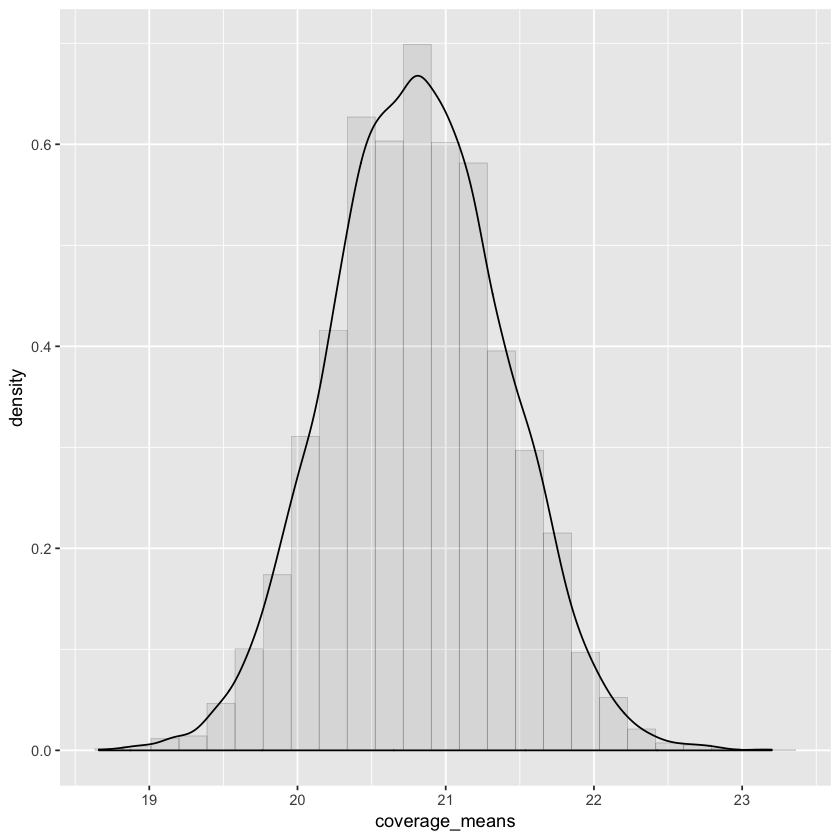

In [68]:
ggplot()+
    geom_histogram(aes(x=coverage_means, y=..density..), bins = 25, alpha=0.1, color="black", size=0.05) +
    geom_density(aes(x=coverage_means), color="black")
    

In [69]:
mean(coverage_means)

[1] 20.81018

In [91]:
data_new <- read_csv("re_sample_2021.csv")

head(data_new)

Parsed with column specification:
cols(
  experiment_id = col_double(),
  quadrat_id = col_double(),
  coverage = col_double()
)


experiment_id,quadrat_id,coverage
1,46,24
2,20,22
3,10,26
4,18,21
5,11,30
6,56,21


In [96]:
set.seed(42)

n = 10000

new_coverage_means <- n %>%
  replicate(sample(data_new$coverage, 25)) %>%
  t() %>%
  apply(  1, mean)

new_sample_avg <- mean(new_coverage_means)
new_sample_avg

[1] 23.68

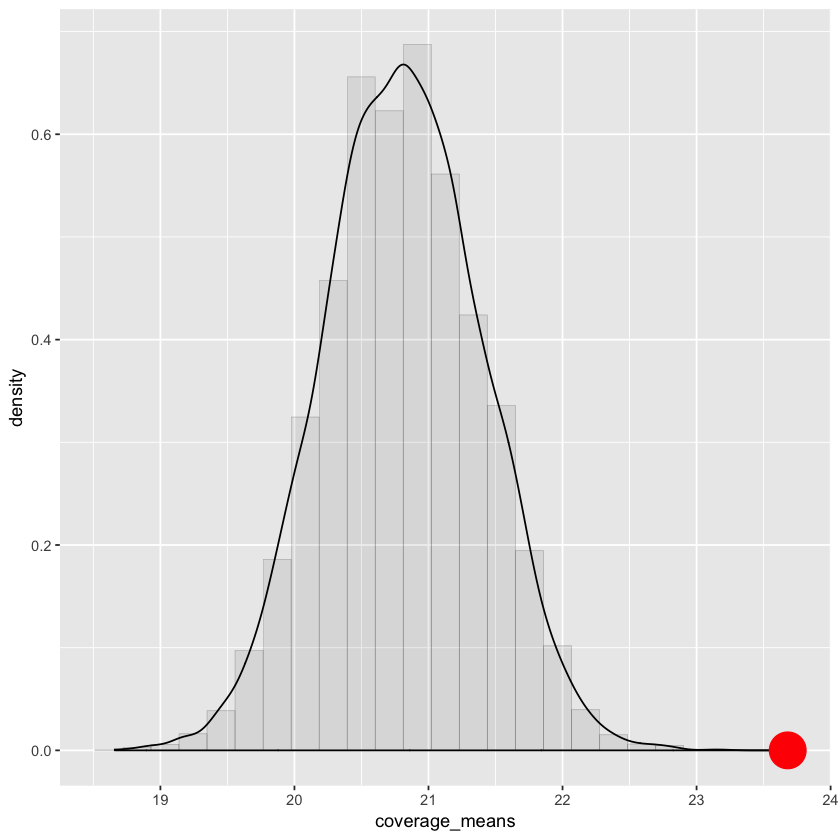

In [95]:
ggplot()+
    geom_histogram(aes(x=coverage_means, y=..density..), bins = 25, alpha=0.1, color="black", size=0.05) +
    geom_density(aes(x=coverage_means), color="black")+
    geom_point(aes(x=new_sample_avg, y=0), size=10, color="red")

In [99]:
sum(coverage_means >= new_sample_avg)

#mean of 2021 coverage is far from 2018 mean
#probability  of observing a coverage mean from 2018 that is >= the 2021 mean is ~0
#p-value = 0.0
#The mean coral cover is significantly higher in 2021 than in 2018

[1] 0